# loading required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import os

# Data Manipulation

In [57]:
# Reading data
os.chdir('/Users/fahimahmad/Documents/Germany/MIT/2024-group-06-cdsp') # for myself; set the path
file_path = "./data_collection/attacks-on-health-care-systems-data.xlsx"
df = pd.read_excel(file_path)

In [60]:
# get only year and month from the date column
df['year_month_day'] = pd.to_datetime(df['Attack Date'])
df['year_month'] = pd.to_datetime(df['year_month_day'].dt.strftime('%Y-%m'))

# Exploring the data through visualization

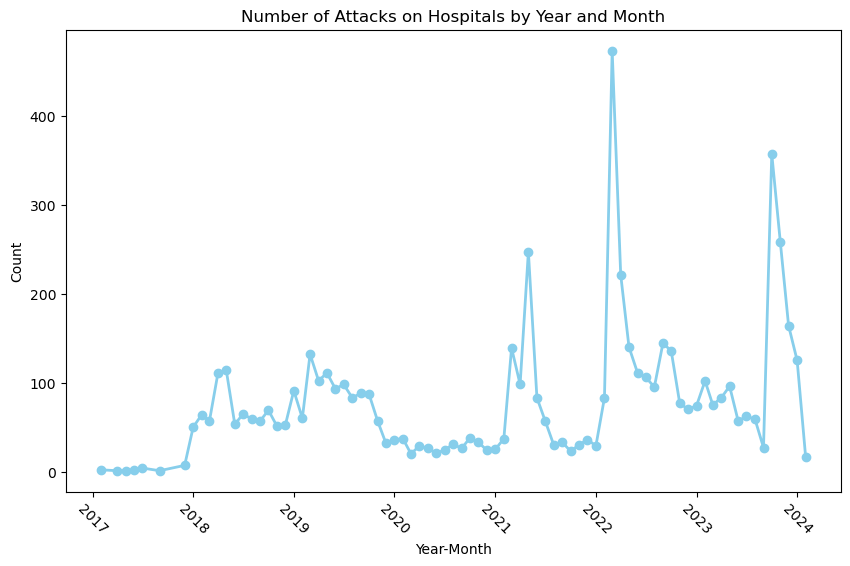

In [61]:
attacks_by_date = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(attacks_by_date.index, attacks_by_date.values, marker='o', color='skyblue', linewidth=2)
plt.xticks(rotation=-45)

plt.title('Number of Attacks on Hospitals by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.show()

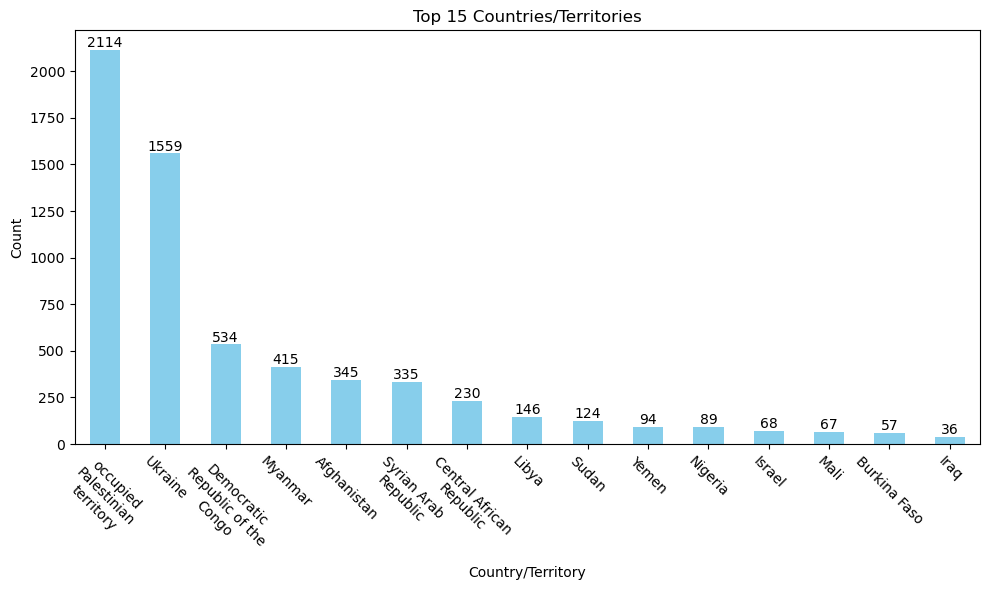

In [62]:
# Hospitals in which country are attacked most frequently?
country_counts = df['Country / Territory'].value_counts().head(15)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = country_counts.plot(kind='bar', color='skyblue')

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points')

wrapped_labels = [textwrap.fill(label, 15) for label in country_counts.index]
plt.xticks(range(len(country_counts)), wrapped_labels)
plt.xticks(rotation=-45)

plt.title('Top 15 Countries/Territories')
plt.xlabel('Country/Territory')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

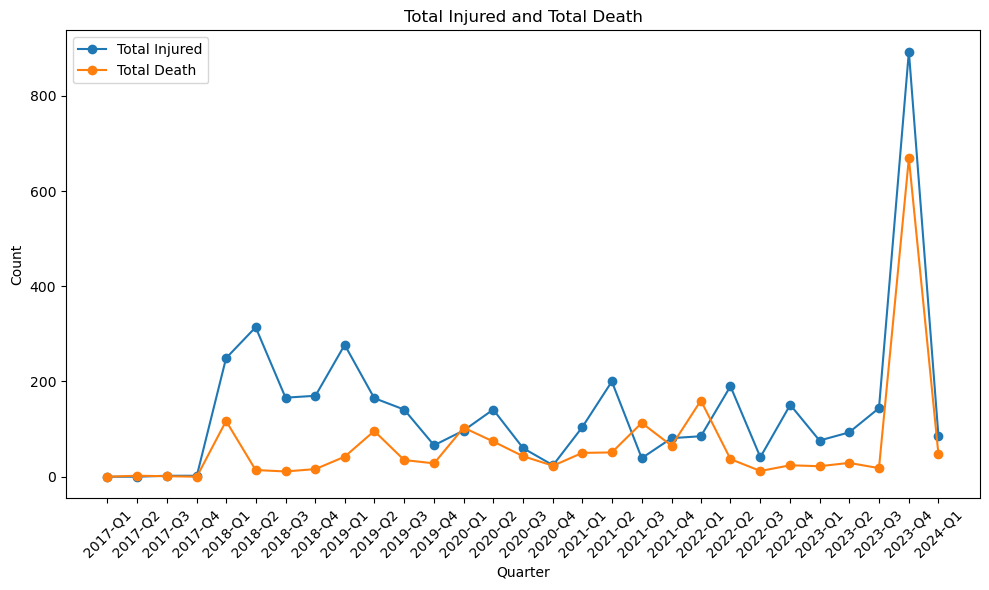

In [63]:
# Total Injured and Deaths
quarterly_totals = df.resample('Q', on='year_month_day')[['Total Injured', 'Total Death']].sum()

plt.figure(figsize=(10, 6))
plt.plot(quarterly_totals.index, quarterly_totals['Total Injured'], label='Total Injured', marker='o')
plt.plot(quarterly_totals.index, quarterly_totals['Total Death'], label='Total Death', marker='o')

plt.title('Total Injured and Total Death')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.legend()

plt.xticks(quarterly_totals.index, [f'{q.year}-Q{q.quarter}' for q in quarterly_totals.index], rotation=45)

plt.tight_layout()
plt.show()